In [1]:
import pandas as pd

# Tabela de geração

In [4]:
geracao = pd.read_csv('GeracaoFonte.csv')

In [5]:
geracao.drop(columns=['ideGeracaoFonte','mesReferencia'], inplace=True)


In [6]:
ano_referencia = geracao.groupby(["nomFonteGeracao", "anoReferencia"]).sum().to_csv('anoReferencia.csv')

In [7]:
ano_referencia.head().to_csv('anoReferencia.csv', index=False)

AttributeError: 'NoneType' object has no attribute 'head'

# tabela de termo eletricas

In [8]:
termos = pd.read_csv('UsinaTermeletricaTipo.csv')

In [9]:
termos.drop(columns=['ideUsinaTermeletricaTipo','mesReferencia', 'dthProcessamento'], inplace=True)

In [10]:
termos.groupby(['dscOrigem', 'nomTipoUsina',"nomSubTipoUsina", "anoReferencia"]).sum().to_csv("biomassas.csv")

# Visualização de dados

In [2]:
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('dadosPizza.csv')

In [15]:
data.head(15)

,fonte,energia
0,Biomassas,3862.65360
1,Carvao,4704.34968
2,Energia produzida fora do SIN,0.00000
3,Eolicas,19148.11152
4,Gas Natural,18044.49840
5,Hidreletricas exclusive Itaipu,180444.46248
6,Itaipu,30202.14720
7,Nuclear,7267.10712
8,Oleo Diesel / Combustivel,437.21208
9,Residuos Processos Industriais,4778.28816


In [20]:
data = pd.read_csv('processados/data.csv')

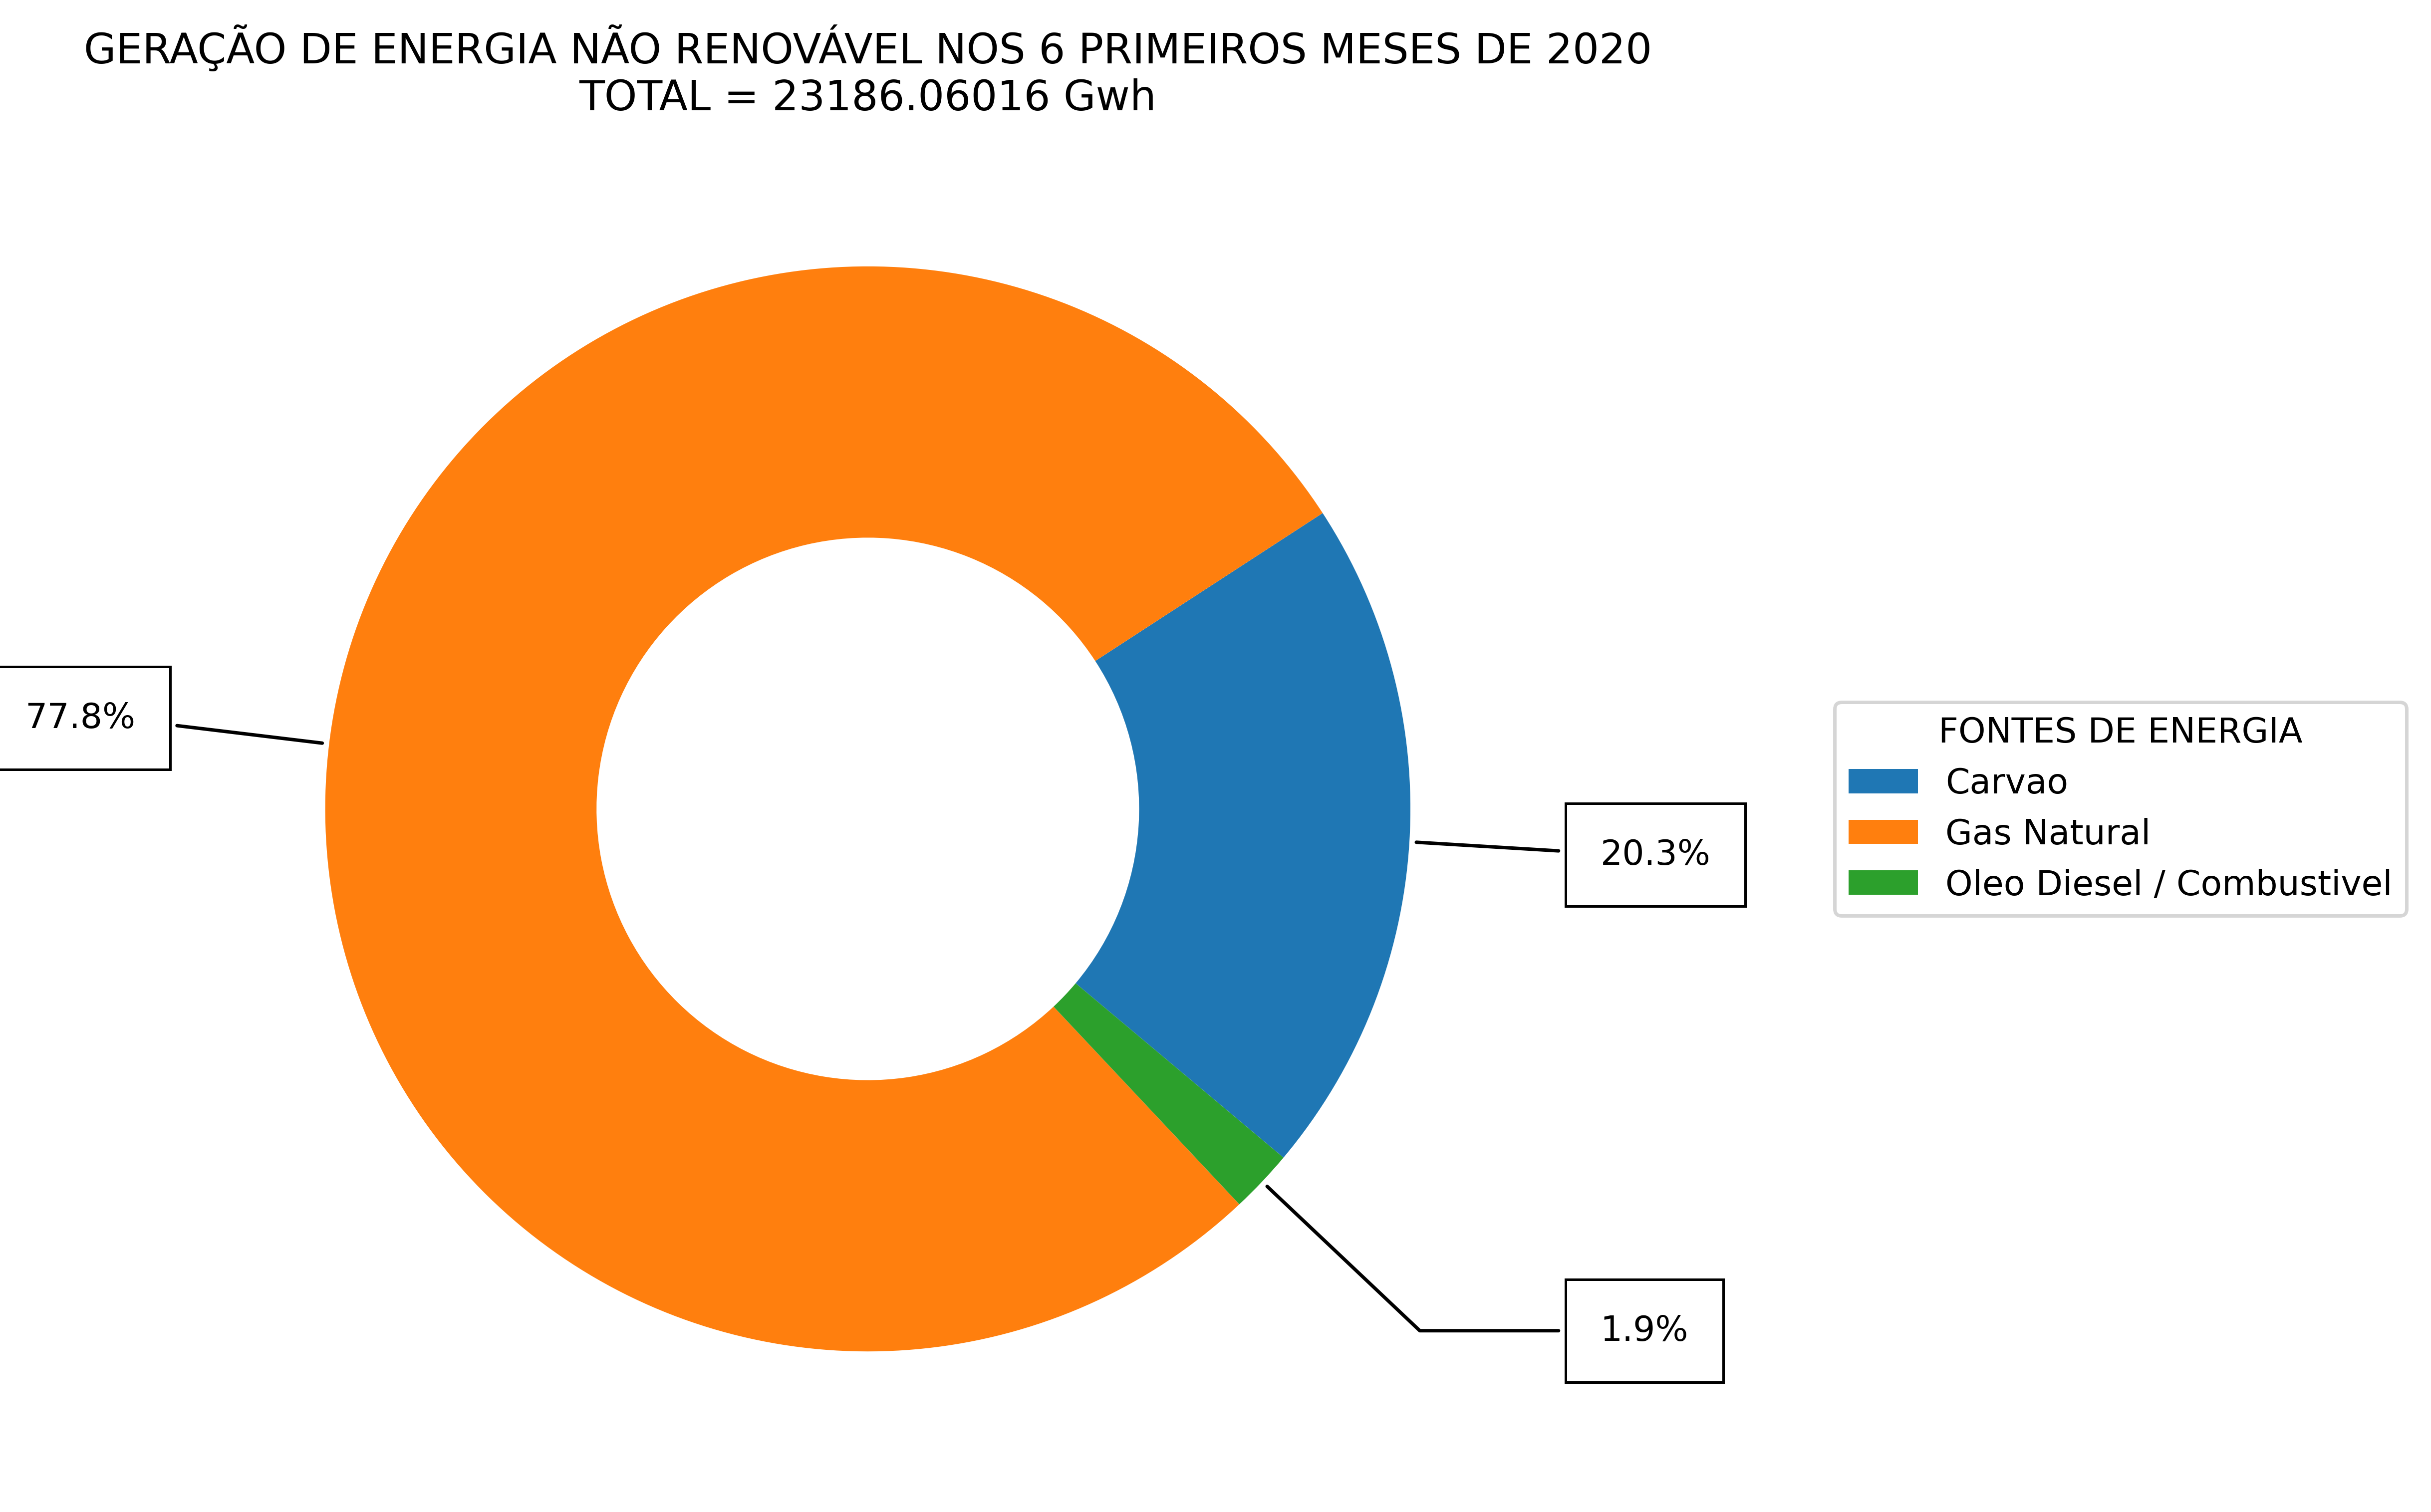

In [26]:
#import pandas as pd
#import matplotlib.pyplot as plt 
import numpy as np

dados = data['energia']
eixo = data['fonte']

fig, ax = plt.subplots(figsize=(12.8, 7.2), dpi=500, subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absoluto = pct*100/allvals.sum()
    return "{:.1f}%".format(absoluto)

recipe = dados.apply(lambda pct: func(pct, dados))


wedges, texts = ax.pie(dados, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=1", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.legend(wedges, eixo,
          title="FONTES DE ENERGIA",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

ax.set_title(f'GERAÇÃO DE ENERGIA NÃO RENOVÁVEL NOS 6 PRIMEIROS MESES DE 2020\nTOTAL = {dados.sum()} Gwh')
#plt.savefig('pizaaNaoRenovaveis.png', dpi=500)
plt.show()